#### Analysis of TRacking data from 2020 07 28 - Cell tracking performed in Harmony Software to find position of DRAQ5 stained cells.

Importing of libraries

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind, f_oneway, normaltest, variation

File location:

In [2]:
tracksfile1 = "20200728_tracks.csv"
tracksfile2 = "20200908_tracks.csv"
tracksfile3 = "20210316_tracks.csv"
tracksfile4 = "20210317_tracks.csv"
objectsfile1 = "20200728_objects.csv"
objectsfile2 = "20200908_objects.csv"
objectsfile3 = "20210316_objects.csv"
objectsfile4 = "20210317_objects.csv"

tracksframe1 = pd.read_csv(tracksfile1, index_col=False)
tracksframe2 = pd.read_csv(tracksfile2, index_col=False)
tracksframe3 = pd.read_csv(tracksfile3, index_col=False)
tracksframe4 = pd.read_csv(tracksfile4, index_col=False)

tracksframe1 = tracksframe1.drop(columns = ['Row', 'Field', 'Object No', 'First Timepoint', 'Last Timepoint', 'Start Time', 'End Time'])
tracksframe2 = tracksframe2.drop(columns = ['Row', 'Field', 'Object No', 'First Timepoint', 'Last Timepoint', 'Start Time', 'End Time'])
tracksframe3 = tracksframe3.drop(columns = ['Row', 'Field', 'Object No', 'First Timepoint', 'Last Timepoint', 'Start Time', 'End Time','Compound'])
tracksframe4 = tracksframe4.drop(columns = ['Row', 'Field', 'First Timepoint', 'Last Timepoint', 'Start Time', 'End Time'])

tracksframe1['Compound'] = 1
tracksframe1['Compound'].loc[tracksframe1['Column'] == 1]="PBS"
tracksframe1['Compound'].loc[tracksframe1['Column'] == 2]="MVS"
tracksframe1['Compound'].loc[tracksframe1['Column'] == 3]="EXO"
tracksframe2['Compound'] = 1
tracksframe2['Compound'].loc[tracksframe2['Column'] == 2]="PBS"
tracksframe2['Compound'].loc[tracksframe2['Column'] == 3]="MVS"
tracksframe2['Compound'].loc[tracksframe2['Column'] == 4]="EXO"
tracksframe3['Compound'] = 1
tracksframe3['Compound'].loc[tracksframe3['Column'] == 2]="EXO"
tracksframe3['Compound'].loc[tracksframe3['Column'] == 3]="MVS"
tracksframe3['Compound'].loc[tracksframe3['Column'] == 4]="PBS"
tracksframe4['Compound'] = 1
tracksframe4['Compound'].loc[tracksframe4['Column'] == 2]="EXO"
tracksframe4['Compound'].loc[tracksframe4['Column'] == 3]="MVS"
tracksframe4['Compound'].loc[tracksframe4['Column'] == 4]="PBS"

tracksframe1 = tracksframe1[tracksframe1['Number of Timepoints'] >= 9]
tracksframe2 = tracksframe2[tracksframe2['Number of Timepoints'] >= 9]
tracksframe3 = tracksframe3[tracksframe3['Number of Timepoints'] >= 9]
tracksframe4 = tracksframe4[tracksframe4['Number of Timepoints'] >= 9]

tracksframe1["Parallell FMI"]=tracksframe1['Displacement Y µm']/tracksframe1["Accumulated Distance µm"]
tracksframe1["Perpendicular FMI"]=tracksframe1['Displacement X µm']/tracksframe1["Accumulated Distance µm"]
tracksframe2["Parallell FMI"]=tracksframe2['Displacement Y µm']/tracksframe2["Accumulated Distance µm"]
tracksframe2["Perpendicular FMI"]=tracksframe2['Displacement X µm']/tracksframe2["Accumulated Distance µm"]
tracksframe3["Parallell FMI"]=tracksframe3['Displacement Y µm']/tracksframe3["Accumulated Distance µm"]
tracksframe3["Perpendicular FMI"]=tracksframe3['Displacement X µm']/tracksframe3["Accumulated Distance µm"]
tracksframe4["Parallell FMI"]=tracksframe4['Displacement Y µm']/tracksframe4["Accumulated Distance µm"]
tracksframe4["Perpendicular FMI"]=tracksframe4['Displacement X µm']/tracksframe4["Accumulated Distance µm"]

trackframes = [tracksframe1,tracksframe2,tracksframe3,tracksframe4]

t3 = pd.concat(trackframes, ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [7]:
t3.head(5)

,Column,Number of Timepoints,Accumulated Distance µm,Displacement µm,Speed µm/s,Straightness,Displacement X µm,Displacement Y µm,Compound,Parallell FMI,Perpendicular FMI
0,1,37,85.0563,9.63208,0.001968,0.113243,9.55770,1.19471,PBS,0.014046,0.112369
1,1,37,63.5099,11.27090,0.001470,0.177467,-5.97356,-9.55770,PBS,-0.150491,-0.094057
2,1,25,139.2160,45.33610,0.004832,0.325653,-43.00960,-14.33650,PBS,-0.102980,-0.308942
3,1,37,271.2690,96.47620,0.006278,0.355648,-13.14180,-95.57700,PBS,-0.352333,-0.048446
4,1,23,164.1220,124.67400,0.006214,0.759646,-39.42550,-118.27600,PBS,-0.720659,-0.240221


In [8]:
t3.to_csv("2022_0715_exportoffiltered_tracks.csv")

In [4]:
objectsfile1 = "20200728_objects.csv"
objectsfile2 = "20200908_objects.csv"
objectsfile3 = "20210316_objects.csv"
objectsfile4 = "20210317_objects.csv"

objectsframe1 = pd.read_csv(objectsfile1)
objectsframe2 = pd.read_csv(objectsfile2)
objectsframe3 = pd.read_csv(objectsfile3)
objectsframe4 = pd.read_csv(objectsfile4)

objectsframe1 = objectsframe1[objectsframe1["Age s"] > 3600]
objectsframe2 = objectsframe2[objectsframe2["Age s"] > 3600]
objectsframe3 = objectsframe3[objectsframe3["Age s"] > 3600]
objectsframe4 = objectsframe4[objectsframe4["Age s"] > 3600]

objectsframe1 = objectsframe1.drop(columns = ["Row", "Timepoint","Position Y µm","Age s", "Current Displacement X µm" ,"Current Displacement Y µm" ,"Track Point X", "Track Point Y", "Current Step Size µm", "Current Speed µm/s"])
objectsframe2 = objectsframe2.drop(columns = ["Row", "Timepoint","Position Y µm","Age s", "Current Displacement X µm" ,"Current Displacement Y µm" ,"Track Point X", "Track Point Y", "Current Step Size µm", "Current Speed µm/s"])
objectsframe3 = objectsframe3.drop(columns = ["Row", "Timepoint","Position Y µm","Age s", "Current Displacement X µm" ,"Current Displacement Y µm" ,"Track Point X", "Track Point Y", "Current Step Size µm", "Current Speed µm/s"])
objectsframe4 = objectsframe4.drop(columns = ["Row", "Timepoint","Age s", "Current Displacement X µm" ,"Current Displacement Y µm" ,"Track Point X", "Track Point Y", "Current Step Size µm", "Current Speed µm/s"])

objectsframe1['Compound'] = 1
objectsframe2['Compound'] = 1
objectsframe3['Compound'] = 1
objectsframe4['Compound'] = 1

objectsframe1['Compound'].loc[objectsframe1['Column'] == 1]="PBS"
objectsframe1['Compound'].loc[objectsframe1['Column'] == 2]="MVS"
objectsframe1['Compound'].loc[objectsframe1['Column'] == 3]="EXO"

objectsframe2['Compound'].loc[objectsframe2['Column'] == 2]="PBS"
objectsframe2['Compound'].loc[objectsframe2['Column'] == 3]="MVS"
objectsframe2['Compound'].loc[objectsframe2['Column'] == 4]="EXO"

objectsframe3['Compound'].loc[objectsframe3['Column'] == 2]="EXO"
objectsframe3['Compound'].loc[objectsframe3['Column'] == 3]="MVS"
objectsframe3['Compound'].loc[objectsframe3['Column'] == 4]="PBS"

objectsframe4['Compound'].loc[objectsframe4['Column'] == 4]="PBS"
objectsframe4['Compound'].loc[objectsframe4['Column'] == 3]="MVS"
objectsframe4['Compound'].loc[objectsframe4['Column'] == 2]="EXO"

objectsframe1 = objectsframe1.drop(columns = ["Column"])
objectsframe2 = objectsframe2.drop(columns = ["Column"])
objectsframe3 = objectsframe3.drop(columns = ["Column"])
objectsframe4 = objectsframe4.drop(columns = ["Column"])

objectsframes = [objectsframe1,objectsframe2,objectsframe3,objectsframe4]

objage = pd.concat(objectsframes)
stringtoobjwrite = "DirectionsandCompounds.csv"
objage.to_csv(stringtoobjwrite)

C:\Users\gchen\AppData\Local\Temp\ipykernel_18476\2580977990.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectsframe1['Compound'].loc[objectsframe1['Column'] == 1]="PBS"
C:\Users\gchen\AppData\Local\Temp\ipykernel_18476\2580977990.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectsframe2['Compound'].loc[objectsframe2['Column'] == 2]="PBS"
C:\Users\gchen\AppData\Local\Temp\ipykernel_18476\2580977990.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [4]:
objage.head()

,Current Direction deg,Compound
33,26.5651,PBS
34,-45.0000,PBS
35,146.3100,PBS
36,90.0000,PBS
37,-52.1250,PBS


In [96]:
print(tracksframe1.columns, "\n",tracksframe2.columns, "\n",tracksframe3.columns, "\n",tracksframe4.columns )

Index(['Column', 'Number of Timepoints', 'Accumulated Distance µm',
       'Displacement µm', 'Speed µm/s', 'Straightness', 'Displacement X µm',
       'Displacement Y µm', 'Compound', 'Parallell FMI', 'Perpendicular FMI'],
      dtype='object') 
 Index(['Column', 'Number of Timepoints', 'Accumulated Distance µm',
       'Displacement µm', 'Speed µm/s', 'Straightness', 'Displacement X µm',
       'Displacement Y µm', 'Compound', 'Parallell FMI', 'Perpendicular FMI'],
      dtype='object') 
 Index(['Column', 'Number of Timepoints', 'Accumulated Distance µm',
       'Displacement µm', 'Speed µm/s', 'Straightness', 'Displacement X µm',
       'Displacement Y µm', 'Compound', 'Parallell FMI', 'Perpendicular FMI'],
      dtype='object') 
 Index(['Column', 'Number of Timepoints', 'Accumulated Distance µm',
       'Displacement µm', 'Speed µm/s', 'Straightness', 'Displacement X µm',
       'Displacement Y µm', 'Compound', 'Parallell FMI', 'Perpendicular FMI'],
      dtype='object')


Plate well column 1 is PBS, 2 is MVS, 3 is exosomes
We have 3 columns in the database column called 'Column' - our three conditions
As shown in the image below

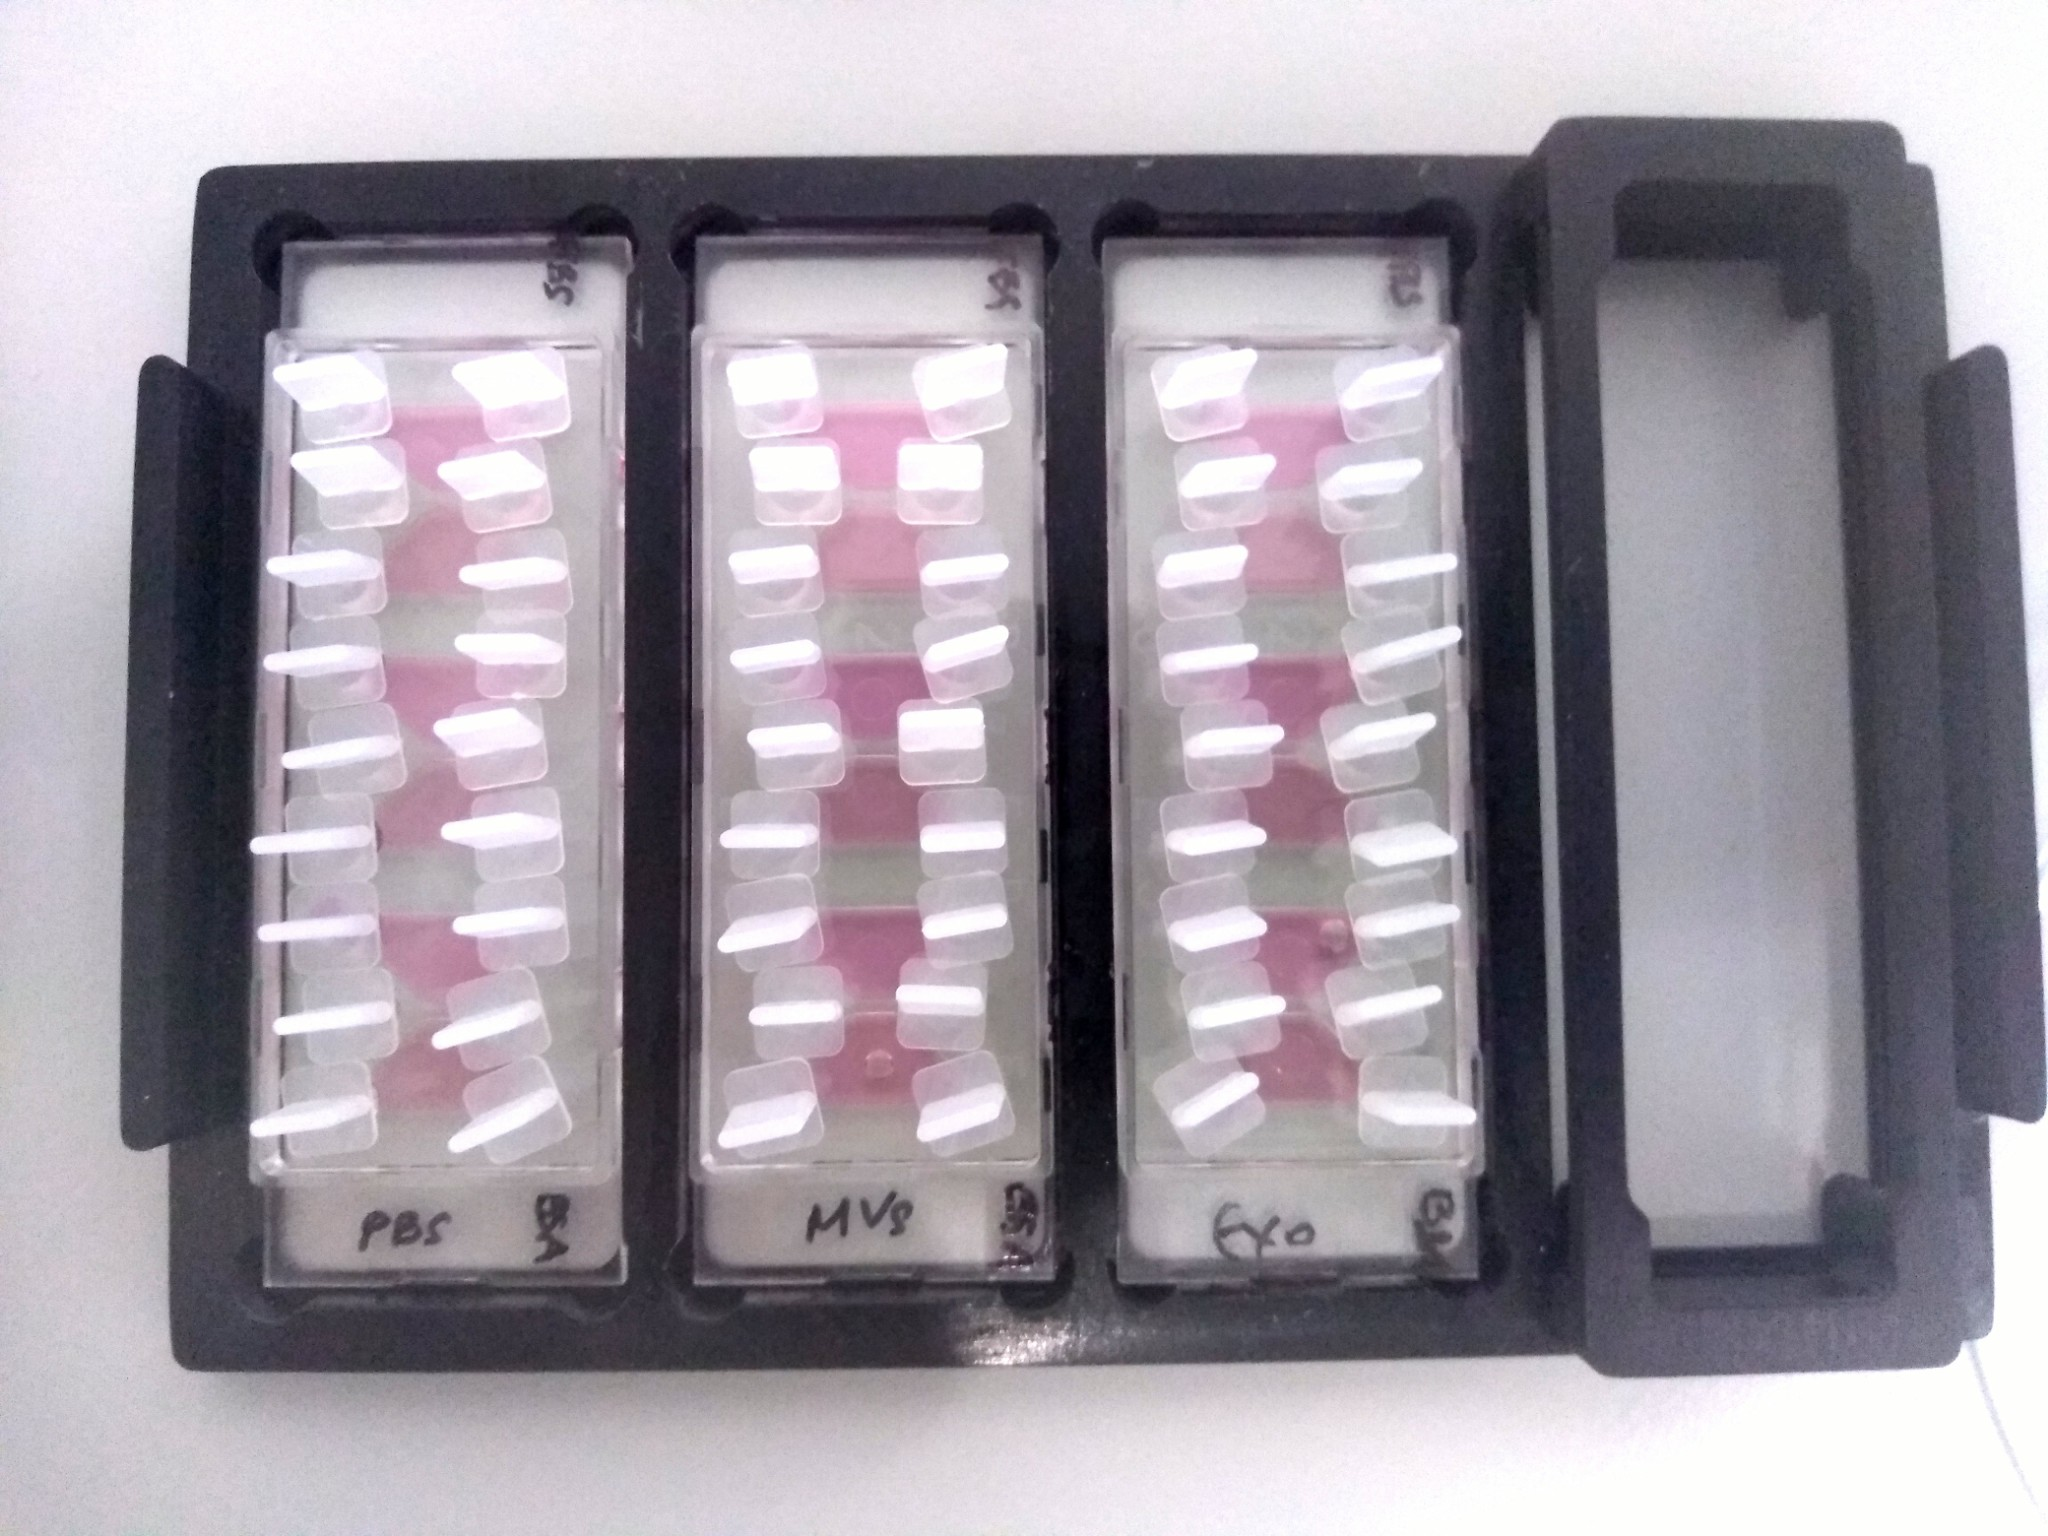

### for invasion 5 and 6 swap the conditions round!!!!

In [97]:
conditions =["PBS", "MVS", "EXO"] #uncomment for 1 and 2 ,34 but we aren't doing 3 and 4 hahaha
#conditions = ["EXO", "MVS","PBS"] #uncomment for invasion 5 and 6
condnum =[1,2,3]

outputstring = "output\\InvasionAssays_merged_individual_tracks_2021_03_25.csv"
#t3.to_csv(outputstring)

In [98]:
t3.head()

,Column,Number of Timepoints,Accumulated Distance µm,Displacement µm,Speed µm/s,Straightness,Displacement X µm,Displacement Y µm,Compound,Parallell FMI,Perpendicular FMI
0,1,37,85.0563,9.63208,0.001968,0.113243,9.55770,1.19471,PBS,0.014046,0.112369
1,1,37,63.5099,11.27090,0.001470,0.177467,-5.97356,-9.55770,PBS,-0.150491,-0.094057
2,1,25,139.2160,45.33610,0.004832,0.325653,-43.00960,-14.33650,PBS,-0.102980,-0.308942
3,1,37,271.2690,96.47620,0.006278,0.355648,-13.14180,-95.57700,PBS,-0.352333,-0.048446
4,1,23,164.1220,124.67400,0.006214,0.759646,-39.42550,-118.27600,PBS,-0.720659,-0.240221


In [99]:
counts = []
timepoints =[]
timestdv=[]
which = []
speed =[]
speedstdev =[]
straightness =[]
straightnessstd =[]
accdist=[]
accdiststd=[]
ydisp=[]
xdisp=[]
fmipar=[]
fmiparstd=[]
fmiper=[]
fmiperstd=[]

for x in condnum:
    which.append(conditions[x-1])
    ft = t3[t3['Compound']== conditions[x-1]]
    count=ft['Column'].count()
    counts.append(count)
    timesmean = ft['Number of Timepoints'].mean()
    timepoints.append(round(timesmean,5))
    timesstd = ft['Number of Timepoints'].std()
    timestdv.append(round(timesstd,5))
    thisspeed = ft['Speed µm/s'].mean()
    speed.append(round(thisspeed,5))
    thisspeedstd =ft['Speed µm/s'].std()
    speedstdev.append(round(thisspeedstd,5))
    thisstraight = ft['Straightness'].mean()
    straightness.append(round(thisstraight,5))
    thisstraightstd = ft['Straightness'].std()
    straightnessstd.append(round(thisstraightstd,5))
    thisaccdist=ft['Accumulated Distance µm'].mean()
    accdist.append(round(thisaccdist,5))
    thisaccdiststd=ft['Accumulated Distance µm'].std()
    accdiststd.append(round(thisaccdiststd,5))
    thisydisp = ft['Displacement Y µm'].mean()
    ydisp.append(round(thisydisp,5))
    thisxdisp = ft['Displacement X µm'].mean()
    xdisp.append(round(thisxdisp,5))
    thisfmipar = ft["Parallell FMI"].mean()
    fmipar.append(round(thisfmipar,5))
    thisfmiparstd = ft["Parallell FMI"].std()
    fmiparstd.append(round(thisfmiparstd,5))
    thisfmiper = ft["Perpendicular FMI"].mean()
    fmiper.append(round(thisfmiper,5))
    thisfmiperstd = ft["Perpendicular FMI"].std()
    fmiperstd.append(round(thisfmiperstd,5))
    
print(which,counts,timepoints,timestdv,speed,speedstdev,straightness,straightnessstd,accdist,accdiststd,ydisp,xdisp,fmipar,fmiparstd,fmiper,fmiperstd)

['PBS', 'MVS', 'EXO'] [1248, 1856, 1324] [21.61538, 21.50431, 22.44109] [10.08653, 9.76765, 10.09083] [0.00342, 0.00317, 0.00357] [0.0022, 0.00224, 0.00268] [0.36842, 0.38451, 0.38158] [0.24253, 0.24159, 0.24952] [78.11285, 72.57531, 80.88732] [54.2598, 53.34423, 53.44455] [-2.57198, -3.0366, 0.06149] [-0.40649, -0.07912, 0.23757] [-0.03119, -0.04721, 0.00416] [0.3124, 0.3252, 0.32115] [-0.00189, -0.00308, 0.00546] [0.31, 0.31353, 0.32372]


In [100]:
directions = pd.DataFrame()
directions['Condition']=which
directions['Counts']=counts
directions['Timepoints (mean)']=timepoints
directions['Timepoints(std)']=timestdv
directions['Speed [µm / sec] (mean)']=speed
directions['Speed [µm / sec] (std)']=speedstdev
directions['Straightness (mean)']=straightness
directions['Straightness (std)']=straightnessstd
directions['Accumulated Distance µm (mean)']=accdist
directions['Accumulated Distance µm (std)']=accdiststd
directions['Parallel FMI (mean)']=fmipar
directions['Parallel FMI (std)']=fmiparstd
directions['Perpendicular FMI (mean)']=fmiper
directions['Perpendicular FMI (std)']=fmiperstd


directions.head()

,Condition,Counts,Timepoints (mean),Timepoints(std),Speed [µm / sec] (mean),Speed [µm / sec] (std),Straightness (mean),Straightness (std),Accumulated Distance µm (mean),Accumulated Distance µm (std),Parallel FMI (mean),Parallel FMI (std),Perpendicular FMI (mean),Perpendicular FMI (std)
0,PBS,1248,21.61538,10.08653,0.00342,0.00220,0.36842,0.24253,78.11285,54.25980,-0.03119,0.31240,-0.00189,0.31000
1,MVS,1856,21.50431,9.76765,0.00317,0.00224,0.38451,0.24159,72.57531,53.34423,-0.04721,0.32520,-0.00308,0.31353
2,EXO,1324,22.44109,10.09083,0.00357,0.00268,0.38158,0.24952,80.88732,53.44455,0.00416,0.32115,0.00546,0.32372


Now we extract the directionality from the objects file

Extract objects with age larger than 3 timepoints = 60min = 60x60sec = 3600s

In [101]:
objage.tail()

,Current Direction deg,Compound
38781,135.0000,PBS
38782,-135.0000,PBS
38783,63.4349,PBS
38785,-45.0000,PBS
38786,135.0000,PBS


In [102]:
direcs = []
direcstd =[]

for x in condnum:
    ft3 = objage[objage['Compound']==conditions[x-1]]
    direc = ft3['Current Direction deg'].astype(float).mean()
    direcs.append(round(direc,5))
    direcsstd = ft3['Current Direction deg'].astype(float).std()
    direcstd.append(round(direcsstd,5))

print(direcs, direcstd)

[13.05773, 13.01572, 15.94266] [103.38466, 102.37327, 101.76221]


In [103]:
directions['Direction [Deg] (mean)'] = direcs
directions['Direction [Deg] (std)'] = direcstd
directions.head()

,Condition,Counts,Timepoints (mean),Timepoints(std),Speed [µm / sec] (mean),Speed [µm / sec] (std),Straightness (mean),Straightness (std),Accumulated Distance µm (mean),Accumulated Distance µm (std),Parallel FMI (mean),Parallel FMI (std),Perpendicular FMI (mean),Perpendicular FMI (std),Direction [Deg] (mean),Direction [Deg] (std)
0,PBS,1248,21.61538,10.08653,0.00342,0.00220,0.36842,0.24253,78.11285,54.25980,-0.03119,0.31240,-0.00189,0.31000,13.05773,103.38466
1,MVS,1856,21.50431,9.76765,0.00317,0.00224,0.38451,0.24159,72.57531,53.34423,-0.04721,0.32520,-0.00308,0.31353,13.01572,102.37327
2,EXO,1324,22.44109,10.09083,0.00357,0.00268,0.38158,0.24952,80.88732,53.44455,0.00416,0.32115,0.00546,0.32372,15.94266,101.76221


In [104]:
stringtofilewrite = "output\\MergedData_analysisresults_2021_03_25.csv"
#directions.to_csv(stringtofilewrite)

# Statistical Tests

## unpaired t-tests for all conditions - speed, accumulated dist and parallel FMI

### swap the column values for testval1 and testval3 for invasions 5 and 6 so that conditions are the same!!!

In [105]:
testval1 = t3[t3['Compound']== "PBS"]
testval2 = t3[t3['Compound']== "MVS"]
testval3 = t3[t3['Compound']== "EXO"]
testob1 = objage[objage['Compound']=="PBS"]
testob2 = objage[objage['Compound']=="MVS"]
testob3 = objage[objage['Compound']=="EXO"]

In [106]:
speedNormChi = [normaltest(testval1["Speed µm/s"]).statistic, normaltest(testval2["Speed µm/s"]).statistic, normaltest(testval3["Speed µm/s"]).statistic]
speedNormP = [normaltest(testval1["Speed µm/s"]).pvalue, normaltest(testval2["Speed µm/s"]).pvalue, normaltest(testval3["Speed µm/s"]).pvalue]


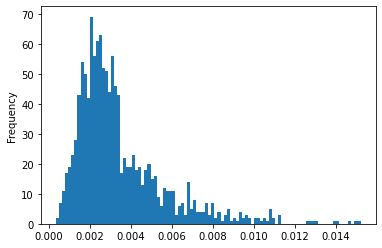

In [107]:
speedplot = testval1["Speed µm/s"].plot.hist(bins=100)


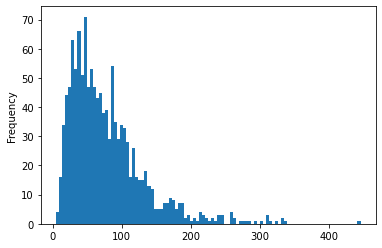

In [108]:
accdistplot = testval1['Accumulated Distance µm'].plot.hist(bins=100)

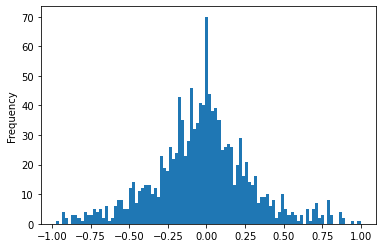

In [109]:
paraFMIplot = testval1["Parallell FMI"].plot.hist(bins=100)

(-180.0, 180.0)

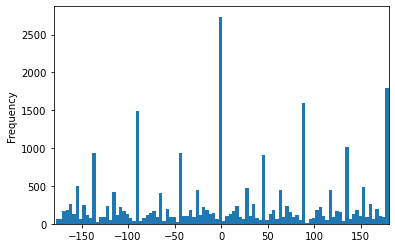

In [110]:
directionplot = testob1['Current Direction deg'].plot.hist(bins=100)
directionplot.set_xlim([-180,180])

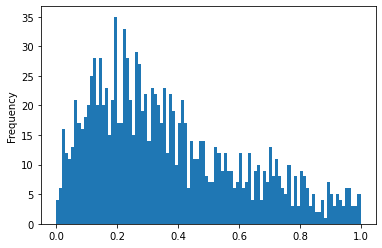

In [111]:
strtnessplot = testval1['Straightness'].plot.hist(bins=100)

In [112]:
testval1['Speed µm/s'].var()

4.845585796188446e-06

In [113]:
testval2['Speed µm/s'].var()

5.009915523485494e-06

In [114]:
testval3['Speed µm/s'].var()

7.179461057157872e-06

In [115]:
speedtestPBSMVS = ttest_ind(testval1['Speed µm/s'],testval2['Speed µm/s'])
speedtestPBSEXO = ttest_ind(testval1['Speed µm/s'],testval3['Speed µm/s'])
speedtestMVSEXO = ttest_ind(testval2['Speed µm/s'],testval3['Speed µm/s'])
accdisttestPBSMVS = ttest_ind(testval1['Accumulated Distance µm'],testval2['Accumulated Distance µm'])
accdisttestPBSEXO = ttest_ind(testval1['Accumulated Distance µm'],testval3['Accumulated Distance µm'])
accdisttestMVSEXO = ttest_ind(testval2['Accumulated Distance µm'],testval3['Accumulated Distance µm'])
paraFMItestPBSMVS = ttest_ind(testval1.dropna()["Parallell FMI"],testval2.dropna()["Parallell FMI"])
paraFMItestPBSEXO = ttest_ind(testval1.dropna()["Parallell FMI"],testval3.dropna()["Parallell FMI"])
paraFMItestMVSEXO = ttest_ind(testval2.dropna()["Parallell FMI"],testval3.dropna()["Parallell FMI"])
directiontestPBSMVS = ttest_ind(testob1['Current Direction deg'],testob2['Current Direction deg'])
directiontestPBSEXO = ttest_ind(testob1['Current Direction deg'],testob3['Current Direction deg'])
directiontestMVSEXO = ttest_ind(testob2['Current Direction deg'],testob3['Current Direction deg'])

strtnesstestPBSMVS = ttest_ind(testval1.dropna()['Straightness'],testval2.dropna()['Straightness'])
strtnesstestPBSEXO = ttest_ind(testval1.dropna()['Straightness'],testval3.dropna()['Straightness'])
strtnesstestMVSEXO = ttest_ind(testval2.dropna()['Straightness'],testval3.dropna()['Straightness'])

In [116]:
speedtestPBSMVS

Ttest_indResult(statistic=3.0956748194979333, pvalue=0.0019811831558470073)

In [117]:
testval1.count()

Column                     1248
Number of Timepoints       1248
Accumulated Distance µm    1248
Displacement µm            1248
Speed µm/s                 1248
Straightness               1248
Displacement X µm          1248
Displacement Y µm          1248
Compound                   1248
Parallell FMI              1248
Perpendicular FMI          1248
dtype: int64

In [118]:
ttests = pd.DataFrame()
test = ['PBS vs MVS','PBS vs EXO', 'MVS vs EXO']

speedstat = []
speedstat.append(speedtestPBSMVS.statistic)
speedstat.append(speedtestPBSEXO.statistic)
speedstat.append(speedtestMVSEXO.statistic)
speedp = []
speedp.append(speedtestPBSMVS.pvalue)
speedp.append(speedtestPBSEXO.pvalue)
speedp.append(speedtestMVSEXO.pvalue)

accdiststat = []
accdiststat.append(accdisttestPBSMVS.statistic)
accdiststat.append(accdisttestPBSEXO.statistic)
accdiststat.append(accdisttestMVSEXO.statistic)
accdistp = []
accdistp.append(accdisttestPBSMVS.pvalue)
accdistp.append(accdisttestPBSEXO.pvalue)
accdistp.append(accdisttestMVSEXO.pvalue)

paraFMIstat = []
paraFMIstat.append(paraFMItestPBSMVS.statistic)
paraFMIstat.append(paraFMItestPBSEXO.statistic)
paraFMIstat.append(paraFMItestMVSEXO.statistic)
paraFMIp = []
paraFMIp.append(paraFMItestPBSMVS.pvalue)
paraFMIp.append(paraFMItestPBSEXO.pvalue)
paraFMIp.append(paraFMItestMVSEXO.pvalue)

directionstat = []
directionstat.append(directiontestPBSMVS.statistic)
directionstat.append(directiontestPBSEXO.statistic)
directionstat.append(directiontestMVSEXO.statistic)
directionp = []
directionp.append(directiontestPBSMVS.pvalue)
directionp.append(directiontestPBSEXO.pvalue)
directionp.append(directiontestMVSEXO.pvalue)

strtnessstat = []
strtnessstat.append(strtnesstestPBSMVS.statistic)
strtnessstat.append(strtnesstestPBSEXO.statistic)
strtnessstat.append(strtnesstestMVSEXO.statistic)
strtnessp = []
strtnessp.append(strtnesstestPBSMVS.pvalue)
strtnessp.append(strtnesstestPBSEXO.pvalue)
strtnessp.append(strtnesstestMVSEXO.pvalue)

ttests['Test']=test
ttests['Speed t-statistic']=speedstat
ttests['Speed p-value']=speedp
ttests['Accumulated Distance t-statistic']=accdiststat
ttests['Accumulated Distance p-value']=accdistp
ttests['Parallel FMI t-statistic']=paraFMIstat
ttests['Parallel FMI p-value']=paraFMIp
ttests['Direction t-statistic']=directionstat
ttests['Direction p-value']=directionp
ttests['Straightness t-statistic']=strtnessstat
ttests['Straightness p-value']=strtnessp

In [119]:
ttests

,Test,Speed t-statistic,Speed p-value,Accumulated Distance t-statistic,Accumulated Distance p-value,Parallel FMI t-statistic,Parallel FMI p-value,Direction t-statistic,Direction p-value,Straightness t-statistic,Straightness p-value
0,PBS vs MVS,3.095675,0.001981,2.816200,0.004890,1.366463,0.171893,0.049826,0.960261,-1.815852,0.069490
1,PBS vs EXO,-1.528706,0.126460,-1.306100,0.191636,-2.827570,0.004727,-3.213132,0.001314,-1.355195,0.175475
2,MVS vs EXO,-4.575954,0.000005,-4.328103,0.000016,-4.413545,0.000011,-3.585244,0.000337,0.331924,0.739968


In [120]:
teststringname = "output\\InvasionAssays_MergedData_ttests_2021_03_25.csv"
#ttests.to_csv(teststringname)

In [121]:
anovas = pd.DataFrame()

In [122]:
speedanova = f_oneway(testval1['Speed µm/s'],testval2['Speed µm/s'],testval3['Speed µm/s'])
accdistanova = f_oneway(testval1['Accumulated Distance µm'],testval2['Accumulated Distance µm'],testval2['Accumulated Distance µm'])
parafmianova = f_oneway(testval1.dropna()['Parallell FMI'],testval2.dropna()['Parallell FMI'],testval3.dropna()['Parallell FMI'])
direcanova = f_oneway(testob1['Current Direction deg'],testob2['Current Direction deg'],testob3['Current Direction deg'])
strtnessanova = f_oneway(testval1.dropna()['Straightness'],testval2.dropna()['Straightness'],testval3.dropna()['Straightness'])

In [123]:
strtnessanova

F_onewayResult(statistic=1.715707515712159, pvalue=0.17995607654635232)

In [124]:
anovastst = ['Speed','Accumulated Distance', 'Parallel FMI', 'Direction', 'Straightness']
anovas['Parameter Tested']=anovastst
anstat = [speedanova.statistic, accdistanova.statistic, parafmianova.statistic, direcanova.statistic, strtnessanova.statistic]
anovas['Statistic'] = anstat
anpval = [speedanova.pvalue, accdistanova.pvalue, parafmianova.pvalue, direcanova.pvalue, strtnessanova.pvalue]
anovas['p-Value']=anpval



anovas


,Parameter Tested,Statistic,p-Value
0,Speed,11.612035,0.000009
1,Accumulated Distance,4.988885,0.006848
2,Parallel FMI,10.055136,0.000044
3,Direction,7.628736,0.000487
4,Straightness,1.715708,0.179956


In [132]:
anovastringtowrite = "output\\InvasionAssays_MergedData_anovas_2021_03_25.csv"
#anovas.to_csv(anovastringtowrite)